In [1]:
#Get the data (20K dataset with numbers replaced with @)
data_dir = "pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [2]:
import os 
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [3]:
def get_lines(filename):
    
    with open(filename,"r") as f:
        return f.readlines()

In [4]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [5]:
len(train_lines)

210040

In [6]:
def preprocess(filename):
    #returns dictionaries
    input_lines = get_lines(filename)
    abstract_lines = ""
    abstract_samples = []
    
    for line in input_lines:
        if line.startswith("###"):
            abstract_is = line
            abstract_lines = ""
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines()
            
            for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                line_data = {}
                target_text_split = abstract_line.split("\t")
                line_data["line_number"] = abstract_line_number
                line_data["target"] = target_text_split[0]
                line_data["text"] = target_text_split[1].lower()
                
                line_data["total_lines"] = len(abstract_line_split) - 1
                abstract_samples.append(line_data)
        else:
            abstract_lines+=line
            
    return abstract_samples

In [7]:
#get sata
train_samples = preprocess(data_dir + "train.txt")
val_samples = preprocess(data_dir + "dev.txt")
test_samples = preprocess(data_dir + "test.txt")

In [8]:
train_samples[:15]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [9]:
import pandas as pd
import numpy as np

train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
val_df = pd.DataFrame(val_samples)

In [10]:
train_df

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11
...,...,...,...,...
180035,7,RESULTS,for the absolute change in percent atheroma vo...,11
180036,8,RESULTS,"for pav , a significantly greater percentage o...",11
180037,9,RESULTS,both strategies had acceptable side effect pro...,11
180038,10,CONCLUSIONS,"compared with standard statin monotherapy , th...",11


In [11]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

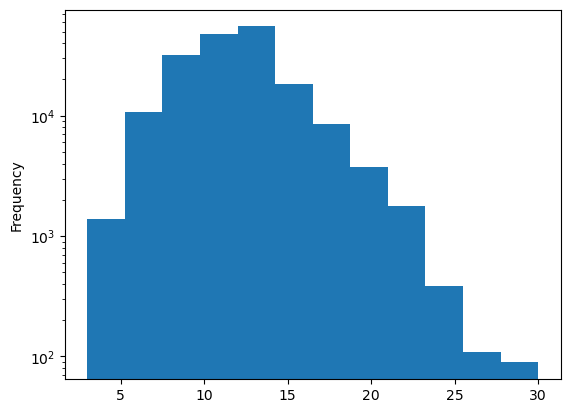

In [12]:
import matplotlib.pyplot as plt
train_df.total_lines.plot.hist(bins=12)
plt.yscale("log")

In [13]:
test_df[:10]

,line_number,target,text,total_lines
0,0,BACKGROUND,this study analyzed liver function abnormaliti...,8
1,1,RESULTS,a post hoc analysis was conducted with the use...,8
2,2,RESULTS,liver function tests ( lfts ) were measured at...,8
3,3,RESULTS,survival analyses were used to assess the asso...,8
4,4,RESULTS,the percentage of patients with abnormal lfts ...,8
5,5,RESULTS,when mean hemodynamic profiles were compared i...,8
6,6,RESULTS,multivariable analyses revealed that patients ...,8
7,7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,8
8,8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8
9,0,BACKGROUND,minimally invasive endovascular aneurysm repai...,12


In [14]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df['text'].tolist()

In [15]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [16]:
#Making nymberic labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False) # we want non-sparse matrix
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# check what one hot encoded labels look like
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_label_encoded = label_encoder.transform(test_df["target"].to_numpy())

# check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [18]:
import tensorflow as tf

In [19]:
#Get class
num_class = len(label_encoder.classes_)
class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## MODEL 0

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#create a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(X=train_sentences,y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [21]:
#evaluate
model_0.score(X=val_sentences,y=val_labels_encoded)
#val_sentences[:10], len(val_labels_encoded)

0.7218323844829869

In [22]:
baseline_preds = model_0.predict(val_sentences)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(val_labels_encoded,baseline_preds))

              precision    recall  f1-score   support

           0       0.66      0.49      0.56      3449
           1       0.65      0.59      0.61      4582
           2       0.72      0.87      0.79      9964
           3       0.75      0.14      0.23      2376
           4       0.76      0.86      0.81      9841

    accuracy                           0.72     30212
   macro avg       0.71      0.59      0.60     30212
weighted avg       0.72      0.72      0.70     30212



In [24]:
from helper_functions import calculate_results

In [25]:
baseline_results = calculate_results(val_labels_encoded,baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 1

In [26]:
from tensorflow.keras import layers

In [27]:
#How long is each sentence on average?
sent_len = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_len)
avg_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

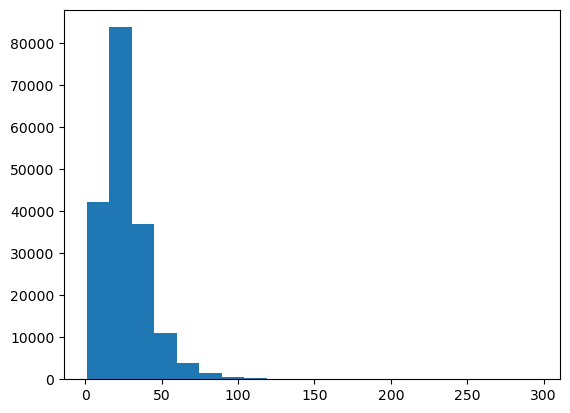

In [28]:
plt.hist(sent_len,bins=20)

In [29]:
#percentiles
output_seq_len = int(np.percentile(sent_len,97.5))
output_seq_len

65

In [30]:
#text vectorizer
max_tokens = 68000

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens = max_tokens, output_sequence_length = output_seq_len)

In [31]:
text_vectorizer.adapt(train_sentences)

In [32]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer([target_sentence])}")

Text:
the objective of this study was to compare two different periodontal plastic surgery procedures to treat miller 's class i recession : a coronally advanced flap ( control group ) versus the pouch technique ( test group ) , both of which were associated with connective tissue graft .

Length of text: 49

Vectorized text: [[    2   367     4    23    17    10     6   226    51   197  2689  5057
    115   705     6   733  8407   130  1024   389  5541     8 15092   588
   2910    35    13   110     2 13053   475   128    13    54     4   126
      9    81     7  9747   669  1031     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]]


In [33]:
# How many words in our training vocabulary
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words in the vocab: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocab: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
Most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [34]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 65,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [35]:
#token_embedding
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab),
                              output_dim=128,
                              mask_zero=True,
                              name="Token_Embedding")

In [36]:
# Show example embedding
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 the objective of this study was to compare two different periodontal plastic surgery procedures to treat miller 's class i recession : a coronally advanced flap ( control group ) versus the pouch technique ( test group ) , both of which were associated with connective tissue graft .

Sentence after vectorization (before embedding):
 [[    2   367     4    23    17    10     6   226    51   197  2689  5057
    115   705     6   733  8407   130  1024   389  5541     8 15092   588
   2910    35    13   110     2 13053   475   128    13    54     4   126
      9    81     7  9747   669  1031     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]]

Sentence after embedding:
 [[[-0.00731933  0.01203896 -0.04601103 ... -0.01231291  0.03409568
    0.02010251]
  [ 0.01562217  0.04723065 -0.02012218 ...  0.03559709  0.01222815
    0.00141338]
  [ 0.02331657 -0.02856711  0.04601

In [37]:
#creating fast loading datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

In [38]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset,valid_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [39]:
#Create Model
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) 
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64,kernel_size=5, padding="same", activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_class, activation="softmax")(x)
model_1 = tf.keras.Model(inputs,outputs)

#compile
model_1.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_1 = model_1.fit(train_dataset,steps_per_epoch=int(0.1*len(train_dataset)),epochs=3,validation_data=valid_dataset,validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 85s 150ms/step - loss: 0.9263 - accuracy: 0.6328 - val_loss: 0.6886 - val_accuracy: 0.7397
Epoch 2/3
562/562 [==============================] - 84s 150ms/step - loss: 0.6608 - accuracy: 0.7543 - val_loss: 0.6323 - val_accuracy: 0.7706
Epoch 3/3
562/562 [==============================] - 100s 178ms/step - loss: 0.6232 - accuracy: 0.7702 - val_loss: 0.6037 - val_accuracy: 0.7842


In [41]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 2s 2ms/step - loss: 0.6057 - accuracy: 0.7836


[0.6056778430938721, 0.7835959196090698]

In [46]:
model_1_results = calculate_results(val_labels_encoded,tf.argmax(model_1.predict(valid_dataset),axis=1))
model_1_results, baseline_results

945/945 [==============================] - 2s 2ms/step


({'accuracy': 78.3595922150139,
  'precision': 0.7804448590304194,
  'recall': 0.7835959221501391,
  'f1': 0.780851353761299},
 {'accuracy': 72.1832384482987,
  'precision': 0.7186466952323352,
  'recall': 0.7218323844829869,
  'f1': 0.6989250353450294})

In [49]:
 calculate_results(test_label_encoded,tf.argmax(model_1.predict(test_dataset),axis=1))

942/942 [==============================] - 2s 2ms/step


{'accuracy': 77.88949726231957,
 'precision': 0.7760666232299164,
 'recall': 0.7788949726231956,
 'f1': 0.7763120880492945}

## MODEL 2

In [50]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [51]:


# Test out the pretrained embedding on a random sentence 
random_train_sentence = random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}")
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f"Setence after embedding:\n{use_embedded_sentence[0][:30]}\n")
print(f"Length of sentence embedding: {len(use_embedded_sentence[0])}")
     


Random sentence:
 the volunteers were randomly divided into two groups of @ patients .
Setence after embedding:
[-0.04764229 -0.0214601   0.00300731  0.0699826  -0.00051395  0.04043375
 -0.03023087  0.01196058 -0.08134951 -0.06671948  0.0856204  -0.03653571
  0.07242416  0.02086929 -0.03657706 -0.02682929 -0.07660593 -0.05236648
 -0.0589686  -0.02973951  0.00706866  0.06152091 -0.05497471 -0.075767
  0.00267494  0.01541722 -0.03701209  0.0698473  -0.00312184  0.02889225]

Length of sentence embedding: 512


In [53]:
# Define feature extraction model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding of each sequence (512 long vector)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(num_class, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_2_USE_feature_extractor")

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [55]:
history_model_2 = model_2.fit(train_dataset,
                              epochs=3,
                              #steps_per_epoch=int(0.1 * len(train_dataset)),
                              validation_data=valid_dataset)
                              #,validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
5627/5627 [==============================] - 46s 8ms/step - loss: 0.6758 - accuracy: 0.7427 - val_loss: 0.6375 - val_accuracy: 0.7567
Epoch 2/3
5627/5627 [==============================] - 44s 8ms/step - loss: 0.6200 - accuracy: 0.7654 - val_loss: 0.6125 - val_accuracy: 0.7676
Epoch 3/3
5627/5627 [==============================] - 46s 8ms/step - loss: 0.5911 - accuracy: 0.7775 - val_loss: 0.6018 - val_accuracy: 0.7727


In [56]:
# Define feature extraction model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding of each sequence (512 long vector)
x = layers.Dense(256, activation="relu")(pretrained_embedding)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(num_class, activation="softmax")(x) # create the output layer
model_2_1 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_2_USE_feature_extractor")

# Compile the model
model_2_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_2_1 = model_2_1.fit(train_dataset,
                              epochs=3,
                              #steps_per_epoch=int(0.1 * len(train_dataset)),
                              validation_data=valid_dataset)
                              #,validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
5627/5627 [==============================] - 51s 9ms/step - loss: 0.6799 - accuracy: 0.7386 - val_loss: 0.6092 - val_accuracy: 0.7672
Epoch 2/3
5627/5627 [==============================] - 46s 8ms/step - loss: 0.5860 - accuracy: 0.7773 - val_loss: 0.5954 - val_accuracy: 0.7741
Epoch 3/3
5627/5627 [==============================] - 49s 9ms/step - loss: 0.5421 - accuracy: 0.7946 - val_loss: 0.6043 - val_accuracy: 0.7724


In [59]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_results = calculate_results(y_true=val_labels_encoded,
                                   y_pred=model_2_preds)
model_2_results

945/945 [==============================] - 6s 6ms/step


{'accuracy': 77.27062094531975,
 'precision': 0.771071357451812,
 'recall': 0.7727062094531975,
 'f1': 0.7685063967484215}

## MODEL 3 CHARACTER LEVEL TOKENIZER

In [64]:
def split_chars(text):
    return " ".join(list(text))

split_chars(random_train_sentence)

't h e   v o l u n t e e r s   w e r e   r a n d o m l y   d i v i d e d   i n t o   t w o   g r o u p s   o f   @   p a t i e n t s   .'

In [65]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [66]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

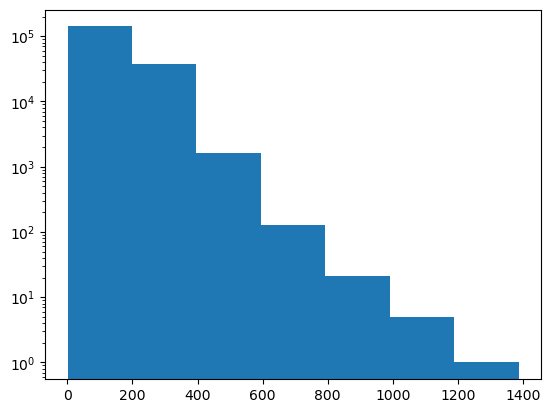

In [67]:
plt.hist(char_lens,bins=7)
plt.yscale("log")

In [73]:
output_seq_char_len = int(np.percentile(char_lens, 96))
output_seq_char_len

304

In [74]:
#get all keyboard values
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [76]:
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,output_sequence_length= output_seq_char_len, name = "char_vectorizer")

In [77]:
char_vectorizer.adapt(train_chars)

In [78]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [91]:
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n {random_train_chars}")
print(f"\nLength of random_train_chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n {vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
 l a r g e r   g r o u p s   w o u l d   b e   r e q u i r e d   t o   a r r i v e   a t   d e f i n i t i v e   c o n c l u s i o n s   .

Length of random_train_chars: 59

Vectorized chars:
 [[12  5  8 18  2  8 18  8  7 16 14  9 20  7 16 12 10 22  2  8  2 26 16  4
   8  2 10  3  7  5  8  8  4 21  2  5  3 10  2 17  4  6  4  3  4 21  2 11
   7  6 11 12 16  9  4  7  6  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [92]:
char_embed = layers.Embedding(input_dim=len(char_vocab), # number of different characters
                              output_dim=25, # this is the size of the char embedding in the paper: https://arxiv.org/pdf/1612.05251.pdf (Figure 1)
                              mask_zero=True,
                              name="char_embed")

In [97]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [99]:
#Create Model
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(inputs) 
token_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64,kernel_size=5, padding="same", activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_class, activation="softmax")(x)
model_3 = tf.keras.Model(inputs,outputs)

#compile
model_3.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_3 = model_3.fit(train_char_dataset,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        epochs=3,
                        validation_data=val_char_dataset
                        ,validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
5627/5627 [==============================] - 53s 9ms/step - loss: 1.2819 - accuracy: 0.4602 - val_loss: 1.1947 - val_accuracy: 0.4960
Epoch 2/3
5627/5627 [==============================] - 56s 10ms/step - loss: 1.1424 - accuracy: 0.5327 - val_loss: 1.1289 - val_accuracy: 0.5336
Epoch 3/3
5627/5627 [==============================] - 58s 10ms/step - loss: 1.0780 - accuracy: 0.5652 - val_loss: 1.0750 - val_accuracy: 0.5608


In [100]:
model_3_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=tf.argmax(model_3.predict(val_char_dataset), axis=1))
model_3_results

945/945 [==============================] - 3s 3ms/step


{'accuracy': 56.07705547464583,
 'precision': 0.5344319716953961,
 'recall': 0.5607705547464583,
 'f1': 0.518761022260104}

In [101]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(inputs) 
token_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64,kernel_size=5, padding="same", activation="relu")(token_embeddings)
x=layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_class, activation="softmax")(x)
model_3 = tf.keras.Model(inputs,outputs)

#compile
model_3.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_3 = model_3.fit(train_char_dataset,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        epochs=3,
                        validation_data=val_char_dataset
                        ,validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 7s 10ms/step - loss: 1.1883 - accuracy: 0.5158 - val_loss: 1.0157 - val_accuracy: 0.5861
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 1.0249 - accuracy: 0.5870 - val_loss: 0.9545 - val_accuracy: 0.6190
Epoch 3/3
562/562 [==============================] - 6s 11ms/step - loss: 0.9589 - accuracy: 0.6252 - val_loss: 0.9205 - val_accuracy: 0.6483


In [103]:
#Create Model
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) 
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64,kernel_size=5, padding="same", activation="relu")(token_embeddings)
x=layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_class, activation="softmax")(x)
model_1_1 = tf.keras.Model(inputs,outputs)

#compile
model_1_1.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_1_1 = model_1_1.fit(train_dataset,steps_per_epoch=int(0.1*len(train_dataset)),epochs=3,validation_data=valid_dataset,validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 101s 179ms/step - loss: 0.5790 - accuracy: 0.7860 - val_loss: 0.5565 - val_accuracy: 0.7975
Epoch 2/3
562/562 [==============================] - 92s 164ms/step - loss: 0.4864 - accuracy: 0.8252 - val_loss: 0.5479 - val_accuracy: 0.7962
Epoch 3/3
562/562 [==============================] - 88s 156ms/step - loss: 0.4656 - accuracy: 0.8302 - val_loss: 0.5383 - val_accuracy: 0.7982


In [105]:
model_1_1.evaluate(valid_dataset)

945/945 [==============================] - 2s 2ms/step - loss: 0.5458 - accuracy: 0.7968


[0.5457758903503418, 0.7967694997787476]

## Model 4

In [110]:
#setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128,activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs, outputs = token_outputs)

#setup char inputs/model
char_inputs = layers.Input(shape=(1,),dtype = tf.string , name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings= char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings) #Bi - LSTM
char_model = tf.keras.Model(inputs= char_inputs, outputs=char_bi_lstm)

#concatenate
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,char_model.output])

#create output layers
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_Dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_Dense)
output_layer = layers.Dense(num_class,activation="softmax")(final_dropout)

#construct model with char and token input
model_4 = tf.keras.Model(inputs=[token_model.input,char_model.input],
                        outputs = output_layer,
                        name = "model_4_token_And-char_embedding")

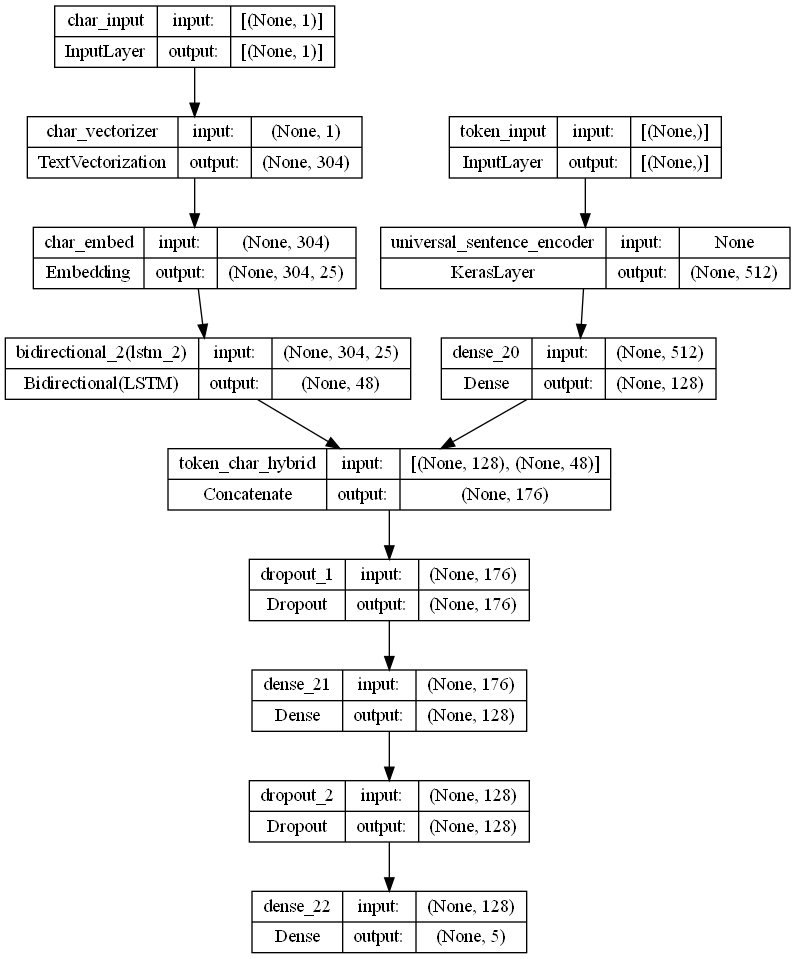

In [115]:
tf.keras.utils.plot_model(model_4,show_shapes=True)

In [117]:
model_4.compile(loss = "categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["Accuracy"])

In [122]:
#combine thw dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_label = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data,train_char_token_label))

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [123]:
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_label = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data,val_char_token_label))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [124]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [130]:
model_4.fit(train_char_token_dataset,steps_per_epoch=int(0.1*len(train_char_token_dataset)),epochs=3,validation_data=val_char_token_dataset,validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 180s 321ms/step - loss: 0.9836 - Accuracy: 0.6106 - val_loss: 0.7789 - val_Accuracy: 0.6998
Epoch 2/3
562/562 [==============================] - 82s 145ms/step - loss: 0.8066 - Accuracy: 0.6899 - val_loss: 0.7241 - val_Accuracy: 0.7274
Epoch 3/3
562/562 [==============================] - 49s 87ms/step - loss: 0.7823 - Accuracy: 0.6995 - val_loss: 0.6954 - val_Accuracy: 0.7377
